In [1]:
from parameters import *
from functions import *
from PDE_solutions import *

dt =T/1000
X0 = [5, 5]
PDEProb = 3.994276568284987e-26

In [29]:
R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R

m = 21

R_list = np.linspace(R_in,R_f,m)

N_list = np.ones(m-1)
N_list[0] = 5
N_list[1] = 5
N_list[2] = 5
N_list += 17
N_list[-1] += 5

# Splitting method

Checking dimensionality of H, Ns and Y.
Radiuses: [7.071 6.768 6.464 6.16  5.857 5.553 5.25  4.946 4.643 4.339 4.036 3.732
 3.428 3.125 2.821 2.518 2.214 1.911 1.607 1.304 1.   ]
Walks per stage: [22. 22. 22. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
 18. 23.]
Timestep: 0.001


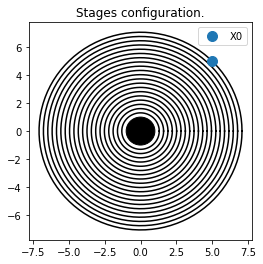


Splitting method starts...
Root:  0
Root:  1
Root:  2
Root:  3
Root:  4
Root:  5
Root:  6
Root:  7
Root:  8
Root:  9
Root:  10
Root:  11
Root:  12
Root:  13
Root:  14
Root:  15
Root:  16
Root:  17
Root:  18
Root:  19
Root:  20
Root:  21



Estimated variance: 9.438529791001337e-25
The estimated probability is: 5.6487625807646715e-24 (using MC)
Confidence interval: [ 5.6487625807646715e-24 +- 1.849917845737098e-24 ]	with P = 95%

PDE result is:  3.994276568284987e-26
Splitting method (basic version) relative error:    140.42141847704022


In [30]:
H = np.zeros(R_list.shape[0]-1) #hits
Y = np.zeros(int(N_list[0]))
Y_SM, H_SM = SplittingMethod(X0, 0., dt, N_list, R_list, Y, H, 0, np.nan, seed = SEED, verbose = 2)
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)
    print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)

# Splitting method with balanced growth

Splitting method with balanced growth.

Radiuses: [7.071 6.768 6.464 6.16  5.857 5.553 5.25  4.946 4.643 4.339 4.036 3.732
 3.428 3.125 2.821 2.518 2.214 1.911 1.607 1.304 1.   ]
Timestep: 0.001


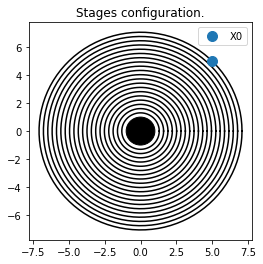


Pilot run with walks per stage:  [22. 22. 22. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
 18. 23.]
Pilot run starts...
Pilot run terminated.
Pilot run results: 
	H = [  2.   6.   8.   8.  15.  18.  25.  30.  49.  79. 117. 160. 197. 220.
 256. 251. 223. 207. 167. 168.]
	p_i = [0.091 0.136 0.061 0.056 0.104 0.067 0.077 0.067 0.091 0.09  0.082 0.076
 0.068 0.062 0.065 0.054 0.049 0.052 0.045 0.044] 
	N = [11  8 17 18 10 15 13 15 12 12 13 14 15 17 16 19 21 20 23 23]

Changing the values multiplying by 2.
New N = [22 16 34 36 20 30 26 30 24 24 26 28 30 34 32 38 42 40 46 46].

Calling the splitting method.
Checking dimensionality of H, Ns and Y.
Radiuses: [7.071 6.768 6.464 6.16  5.857 5.553 5.25  4.946 4.643 4.339 4.036 3.732
 3.428 3.125 2.821 2.518 2.214 1.911 1.607 1.304 1.   ]
Walks per stage: [22 16 34 36 20 30 26 30 24 24 26 28 30 34 32 38 42 40 46 46]
Timestep: 0.001


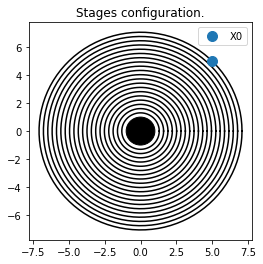


Splitting method starts...
Root:  0
Root:  1
Root:  2
Root:  3
Root:  4
Root:  5
Root:  6
Root:  7


KeyboardInterrupt: 

In [31]:
Y_SM, H_SM, N_SM = SplittingMethodBalancedGrowth(X0, dt, R_list, N_list, T = 1, multiplier = 2, verbose = 2, seed = SEED)
print('\n\n')
if H_SM is not np.nan:
    mean_SM_BG, std = ComputeEstimatesSplittingMethod(Y_SM, N_SM, PDEProb)

# Error comparison

In [ ]:
print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
print('Splitting method (balanced growth) relative error: ', np.abs(PDEProb - mean_SM_BG)/PDEProb)

Checking dimensionality of H, Ns and Y.
Radiuses: [7.071 6.768 6.464 6.16  5.857 5.553 5.25  4.946 4.643 4.339 4.036 3.732
 3.428 3.125 2.821 2.518 2.214 1.911 1.607 1.304 1.   ]
Walks per stage: [19 14 30 32 18 27 23 27 21 21 23 25 27 30 28 34 37 36 41 41]
Timestep: 0.001


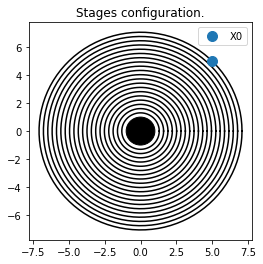


Splitting method starts...
Root:  0
Root:  1
Root:  2
Root:  3
Root:  4
Root:  5
Root:  6
Root:  7
Root:  8
Root:  9
Root:  10


KeyboardInterrupt: 

In [34]:
N_list = (np.array([11,  8, 17, 18, 10, 15, 13, 15, 12, 12, 13, 14, 15, 17, 16, 19, 21, 20, 23, 23])*1.8).astype('int')
H = np.zeros(R_list.shape[0]-1) #hits
Y = np.zeros(int(N_list[0]))
Y_SM, H_SM = SplittingMethod(X0, 0., dt, N_list, R_list, Y, H, 0, np.nan, seed = SEED, verbose = 2)
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)
    print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
